In [1]:

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('accident.csv')
df.head()

,Date,Time,Weather,Road_Type,Number_of_Vehicles,Severity
0,2024-04-01,08:00,Sunny,Highway,2,Minor
1,2024-04-02,13:30,Rainy,City Street,1,Major
2,2024-04-03,17:45,Foggy,Rural Road,3,Major
3,2024-04-04,09:15,Sunny,Highway,2,Minor
4,2024-04-05,16:20,Cloudy,City Street,1,Minor


In [3]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Number_of_Vehicles']])
y_predicted

array([0, 2, 3, 0, 2, 1, 0, 2, 3, 0, 2, 1, 0, 2, 3, 0, 2, 1, 0, 2],
      dtype=int32)

In [4]:
df['cluster'] = y_predicted
df.head()

,Date,Time,Weather,Road_Type,Number_of_Vehicles,Severity,cluster
0,2024-04-01,08:00,Sunny,Highway,2,Minor,0
1,2024-04-02,13:30,Rainy,City Street,1,Major,2
2,2024-04-03,17:45,Foggy,Rural Road,3,Major,3
3,2024-04-04,09:15,Sunny,Highway,2,Minor,0
4,2024-04-05,16:20,Cloudy,City Street,1,Minor,2


In [5]:
cluster_names = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4'
}
# Map cluster labels to cluster names
df['Cluster_Name'] = df['cluster'].map(cluster_names)


In [6]:
df.head()

,Date,Time,Weather,Road_Type,Number_of_Vehicles,Severity,cluster,Cluster_Name
0,2024-04-01,08:00,Sunny,Highway,2,Minor,0,Cluster 1
1,2024-04-02,13:30,Rainy,City Street,1,Major,2,Cluster 3
2,2024-04-03,17:45,Foggy,Rural Road,3,Major,3,Cluster 4
3,2024-04-04,09:15,Sunny,Highway,2,Minor,0,Cluster 1
4,2024-04-05,16:20,Cloudy,City Street,1,Minor,2,Cluster 3


In [7]:
km.cluster_centers_

array([[2.],
       [4.],
       [1.],
       [3.]])

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python

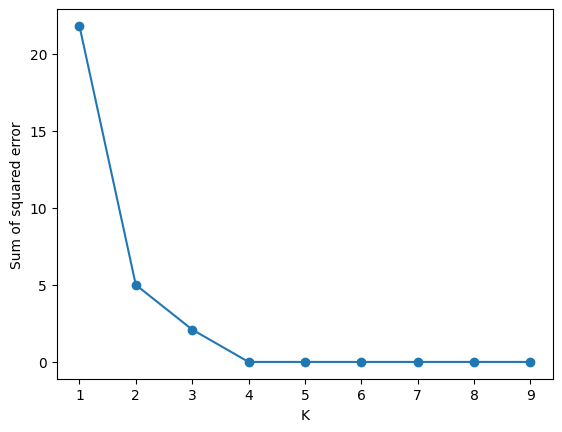

In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Number_of_Vehicles']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [9]:
df.to_csv('output(acccident_data).csv', index=False)
df

,Date,Time,Weather,Road_Type,Number_of_Vehicles,Severity,cluster,Cluster_Name
0,2024-04-01,08:00,Sunny,Highway,2,Minor,0,Cluster 1
1,2024-04-02,13:30,Rainy,City Street,1,Major,2,Cluster 3
2,2024-04-03,17:45,Foggy,Rural Road,3,Major,3,Cluster 4
3,2024-04-04,09:15,Sunny,Highway,2,Minor,0,Cluster 1
4,2024-04-05,16:20,Cloudy,City Street,1,Minor,2,Cluster 3
5,2024-04-06,11:10,Snowy,Rural Road,4,Major,1,Cluster 2
6,2024-04-07,07:55,Sunny,Highway,2,Minor,0,Cluster 1
7,2024-04-08,14:40,Rainy,City Street,1,Minor,2,Cluster 3
8,2024-04-09,18:25,Foggy,Rural Road,3,Major,3,Cluster 4
9,2024-04-10,10:30,Sunny,Highway,2,Major,0,Cluster 1
